In [8]:
import urllib2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

import krakenex
%matplotlib inline

In [9]:
btcOK  = urllib2.urlopen("https://www.okcoin.cn/api/v1/ticker.do?symbol=btc_cny").read()
bccOK  = urllib2.urlopen("https://www.okcoin.cn/api/v1/ticker.do?symbol=bcc_cny").read()
ltcOK  = urllib2.urlopen("https://www.okcoin.cn/api/v1/ticker.do?symbol=ltc_cny").read()
ethOK  = urllib2.urlopen("https://www.okcoin.cn/api/v1/ticker.do?symbol=eth_cny").read()
etcOK  = urllib2.urlopen("https://www.okcoin.cn/api/v1/ticker.do?symbol=etc_cny").read()

okls=['btcOK','bccOK','ltcOK','ethOK','etcOK']

OKdf = pd.DataFrame([json.loads(ok)['ticker'] for ok in  [btcOK,bccOK,ltcOK,ethOK,etcOK]],index=okls)


In [ ]:
k = krakenex.API()
assetpairls = list(pd.DataFrame(k.query_public('AssetPairs',{})['result']).columns.values)

euro_pair = [u'BCHEUR', u'DASHEUR', u'XETCZEUR', u'XETHZEUR', u'XLTCZEUR', u'XREPZEUR', u'XXBTZEUR', u'XXMRZEUR', u'XXRPZEUR', u'XZECZEUR']
usd_pair = [u'BCHUSD', u'DASHUSD', u'USDTZUSD', u'XETCZUSD', u'XETHZUSD', u'XLTCZUSD', u'XXBTZUSD', u'XXMRZUSD', u'XXRPZUSD', u'XZECZUSD']
jpy_pair = [u'XETHZJPY', u'XXBTZJPY']
gbp_pair = [u'XETHZGBP', u'XXBTZGBP']
cad_pair = [u'XETHZCAD', u'XXBTZCAD']
del_pair = [u'XETHXXBT.d', u'XETHZCAD.d', u'XETHZEUR.d', u'XETHZGBP.d', u'XETHZJPY.d', u'XETHZUSD.d', u'XXBTZCAD.d', u'XXBTZEUR.d', u'XXBTZGBP.d', u'XXBTZJPY.d', u'XXBTZUSD.d']
x_pair =list (set(assetpairls)-set(euro_pair)-set(usd_pair)-set(jpy_pair)-set(gbp_pair)-set(cad_pair)-set(del_pair))
x_xbt_pair = [i for i in x_pair if i[-3:]=='XBT']
x_eth_pair = [i for i in x_pair if i[-3:]=='ETH']




#k.load_key('krakenapikey.txt')

euro_pair = ['XXBTZEUR','BCHEUR','XLTCZEUR','XETHZEUR','XETCZEUR','XETCXXBT','BCHXBT']
ok_xbt_pair = ['BCHXBT','XLTCXXBT','XETHXXBT','XETCXXBT']

In [ ]:
krakenls = euro_pair
krakenEURdf=pd.DataFrame([{'buy':(k.query_public('Ticker', {'pair': kraken}))['result'][kraken]['a'][0],
'sell':(k.query_public('Ticker', {'pair': kraken}))['result'][kraken]['b'][0]} for kraken in krakenls],index=krakenls)

In [12]:
krakenls= ok_xbt_pair
krakenXBTdf=pd.DataFrame([{'buy':(k.query_public('Ticker', {'pair': kraken}))['result'][kraken]['a'][0],
'sell':(k.query_public('Ticker', {'pair': kraken}))['result'][kraken]['b'][0]} for kraken in krakenls],index=krakenls)

In [54]:
print 'Kraken:'
print krakenXBTdf
print '-'*50
print 'OK coin:'
print OKdf.ix[1:,['buy','sell']].astype('float')

Kraken:
                 buy        sell
BCHXBT    0.13493000  0.13415000
XLTCXXBT  0.01614200  0.01602500
XETHXXBT    0.070080    0.070030
XETCXXBT  0.00367800  0.00364000
--------------------------------------------------
OK coin:
           buy     sell
bccOK  2931.45  2960.59
ltcOK   408.51   408.62
ethOK  1782.00  1784.00
etcOK    91.50    91.77


In [63]:
np.array(krakenXBTdf['sell'].astype(float))
np.array(OKdf.ix[1:,'buy'].astype(float))
(np.array(krakenXBTdf['sell'].astype(float))*float(OKdf.loc['btcOK','sell']))/np.array(OKdf.ix[1:,'buy'].astype(float))

array([ 1.16668696,  1.00009557,  1.00189587,  1.01420664])

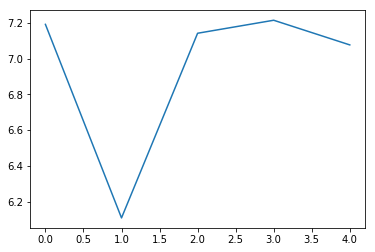

In [22]:
tmpk=krakendf.iloc[:5,:]
tmpo=OKdf[['buy','sell']]
plt.plot(np.array([np.array(tmpo['buy'].astype(float))/np.array((tmpk['sell']).astype(float))])[0])

In [20]:
tmpk

,buy,sell
XXBTZEUR,3549.50000,3541.00000
BCHEUR,480.000000,479.900000
XLTCZEUR,57.21000,57.20000
XETHZEUR,247.00000,247.00000
XETCZEUR,13.09100000,12.93000000
XETCXXBT,0.00364900,0.00364300
